In [1]:
# Some imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [3]:
# read csv file
df = pd.read_csv('/content/Uber Request Data.csv',
                 parse_dates=['Request timestamp', 'Drop timestamp'],
                 dayfirst=True)

In [4]:
# create new column for trip duration
df['Trip duration'] = df['Drop timestamp'] - df['Request timestamp']

In [5]:
# convert trip duration to minutes
df['Trip duration (mins)'] = df['Trip duration'] / np.timedelta64(1, 'm')
# for i in df['Trip duration']:
#   if i is not pd.NaT:
#     print(i, i / np.timedelta64(1, 'm'))

In [6]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip duration,Trip duration (mins)
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,0 days 01:09:00,69.000000
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,0 days 00:50:00,50.000000
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,0 days 00:41:00,41.000000
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,0 days 00:55:00,55.000000
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31,52.516667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Request id            6745 non-null   int64          
 1   Pickup point          6745 non-null   object         
 2   Driver id             4095 non-null   float64        
 3   Status                6745 non-null   object         
 4   Request timestamp     6745 non-null   datetime64[ns] 
 5   Drop timestamp        2831 non-null   datetime64[ns] 
 6   Trip duration         2831 non-null   timedelta64[ns]
 7   Trip duration (mins)  2831 non-null   float64        
dtypes: datetime64[ns](2), float64(2), int64(1), object(2), timedelta64[ns](1)
memory usage: 421.7+ KB


In [8]:
df.describe()

,Request id,Driver id,Trip duration,Trip duration (mins)
count,6745.000000,4095.000000,2831,2831.000000
mean,3384.644922,149.501343,0 days 00:52:24.825150123,52.413753
std,1955.099667,86.051994,0 days 00:13:51.041580784,13.850693
min,1.000000,1.000000,0 days 00:20:47,20.783333
25%,1691.000000,75.000000,0 days 00:41:00,41.000000
50%,3387.000000,149.000000,0 days 00:52:05,52.083333
75%,5080.000000,224.000000,0 days 01:04:00,64.000000
max,6766.000000,300.000000,0 days 01:23:00,83.000000


In [9]:
# number of trips with trip duration calculated
len(df[(df['Trip duration'].notnull())])

2831

In [10]:
# longest trip duration
df[(df['Trip duration'].notnull())].max()

Request id                             6766
Pickup point                           City
Driver id                             300.0
Status                       Trip Completed
Request timestamp       2016-07-15 23:59:58
Drop timestamp          2016-07-16 01:09:24
Trip duration               0 days 01:23:00
Trip duration (mins)                   83.0
dtype: object

In [11]:
df[(df['Request id'] == 6766)]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip duration,Trip duration (mins)
1042,6766,City,108.0,Trip Completed,2016-07-15 00:06:56,2016-07-15 01:10:34,0 days 01:03:38,63.633333


In [12]:
# number of trips with the same max duration
df[(df['Trip duration'] == df[(df['Trip duration'].notnull())].max()['Trip duration'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip duration,Trip duration (mins)
746,2417,City,77.0,Trip Completed,2016-07-12 19:59:00,2016-07-12 21:22:00,0 days 01:23:00,83.0


In [13]:
# shortest trip
df[(df['Trip duration'].notnull())].min()

Request id                                1
Pickup point                        Airport
Driver id                               1.0
Status                       Trip Completed
Request timestamp       2016-07-11 00:00:00
Drop timestamp          2016-07-11 00:51:00
Trip duration               0 days 00:20:47
Trip duration (mins)              20.783333
dtype: object

In [14]:
df[(df['Request id'] == 1)]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip duration,Trip duration (mins)
2700,1,Airport,285.0,Trip Completed,2016-07-11 00:20:00,2016-07-11 00:51:00,0 days 00:31:00,31.0


In [15]:
# number of trips with the same min duration
df[(df['Trip duration'] == df[(df['Trip duration'].notnull())].min()['Trip duration'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip duration,Trip duration (mins)
2274,4607,City,237.0,Trip Completed,2016-07-14 10:28:45,2016-07-14 10:49:32,0 days 00:20:47,20.783333


In [16]:
# drop shortest and longest trip, create a new df
# min_dur_rec = df[(df['Trip Duration'].notnull())].min()['Request id']
# max_dur_rec = df[(df['Trip Duration'].notnull())].max()['Request id']
# df_new = df[~(df['Request id'] == min_dur_rec) | (df['Request id'] == max_dur_rec)]
# df.loc[df[(df['Trip Duration'].notnull())].min().index]
# df[df['Trip Duration'].notnull()].max()

In [17]:
df_dropped_nulls = df.dropna()
df_dropped_nulls

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip duration,Trip duration (mins)
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,0 days 01:09:00,69.000000
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,0 days 00:50:00,50.000000
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,0 days 00:41:00,41.000000
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,0 days 00:55:00,55.000000
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31,52.516667
...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-07-11 22:54:00,2016-07-11 23:35:00,0 days 00:41:00,41.000000
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,0 days 00:49:30,49.500000
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,0 days 00:42:42,42.700000
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,0 days 01:17:05,77.083333


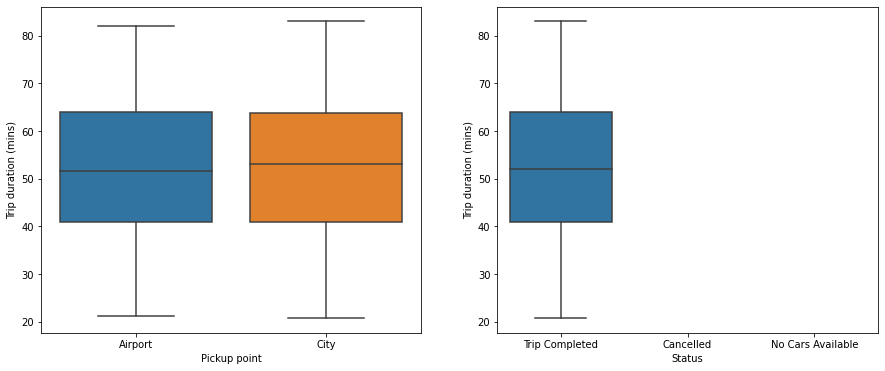

In [44]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs 
sns.boxplot(data=df, x='Pickup point', y='Trip duration (mins)',
            ax=axes_1[0])
sns.boxplot(data=df, x='Status', y='Trip duration (mins)',
            ax=axes_1[1])

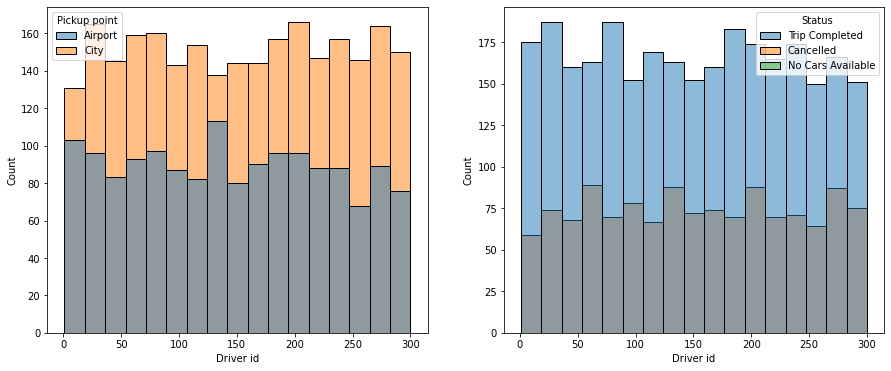

In [45]:
fig_2, axes_2 = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs 
sns.histplot(data=df, x='Driver id', hue='Pickup point',
             ax=axes_2[0])
sns.histplot(data=df, x='Driver id', hue='Status',
             ax=axes_2[1])

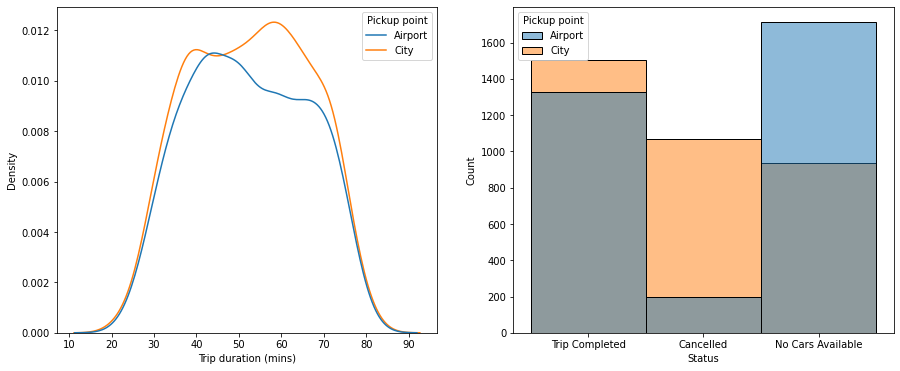

In [46]:
fig_3, axes_3 = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs
sns.kdeplot(data=df, x='Trip duration (mins)', hue='Pickup point',
            ax=axes_3[0])
sns.histplot(data=df, x='Status', hue='Pickup point',
             ax=axes_3[1])

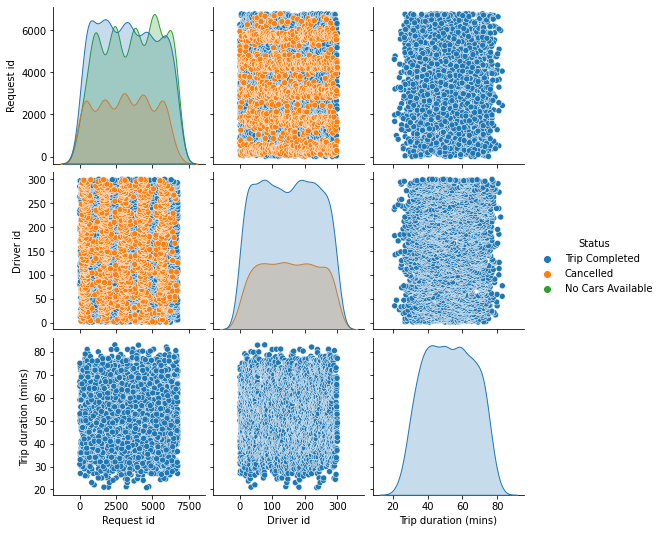

In [31]:
sns.pairplot(df, hue='Status')

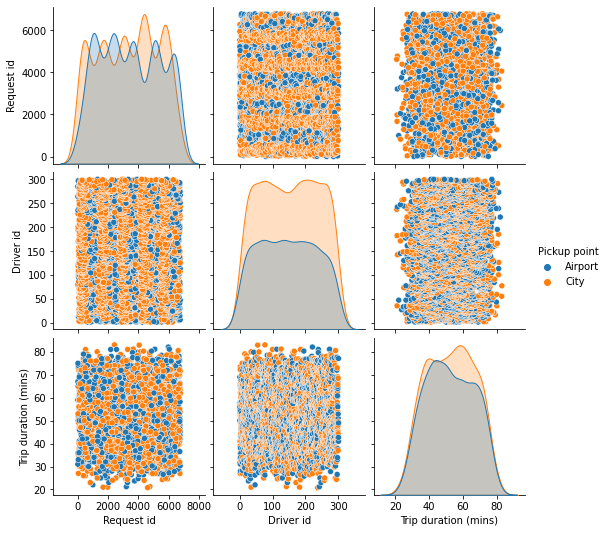

In [33]:
sns.pairplot(df, hue='Pickup point')

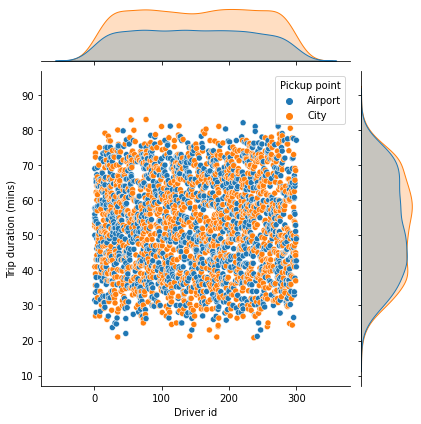

In [38]:
sns.jointplot(data=df, x='Driver id', y='Trip duration (mins)',
              hue='Pickup point')